In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Visualization defaults
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [2]:
file_path = "../data/emi_prediction_dataset.csv"  
df = pd.read_csv(file_path, low_memory=False)

print(f" Dataset loaded successfully with {df.shape[0]:,} rows and {df.shape[1]} columns")

 Dataset loaded successfully with 404,800 rows and 27 columns


In [3]:
display(df.head(10))

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0
5,38,Male,Married,High School,38800.0,Government,5.0,Large Indian,Rented,13500.0,...,No,0.0,792.0,260800.0,55600.0,Vehicle EMI,1257000.0,53,Not_Eligible,500.0
6,58,Male,Single,High School,27100.0,Private,36.0,Large Indian,Own,0.0,...,No,0.0,741.0,68000.0,36200.0,Home Appliances EMI,280000.0,11,Not_Eligible,1950.0
7,58,Female,Married,Post Graduate,392044.0,Private,12.9,MNC,Family,0.0,...,Yes,9900.0,623.0,184600.0,61700.0,E-commerce Shopping EMI,153000.0,12,Not_Eligible,8260.0
8,58,Female,Married,Professional,47700.0,Private,36.0,Large Indian,Family,0.0,...,No,0.0,712.0,235600.0,81800.0,E-commerce Shopping EMI,106000.0,14,Not_Eligible,5500.0
9,32,female,Single,Post Graduate,129200.0,Private,1.9,MNC,Family,0.0,...,Yes,33100.0,681.0,963200.0,519100.0,E-commerce Shopping EMI,81000.0,3,Not_Eligible,9355.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [5]:
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,404800,31,38,119883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,404800,8,Male,237427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,404800,2,Married,307837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,402396,4,Graduate,181015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_salary,404800,13662,18000.0,4159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,404800,3,Private,283099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years_of_employment,404800.0,NaN,NaN,NaN,5.364079,6.079135,0.5,1.2,3.2,7.2,36.0
company_type,404800,5,Large Indian,121139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_type,404800,3,Rented,161601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_rent,402374.0,NaN,NaN,NaN,5828.44649,8648.604639,0.0,0.0,0.0,10600.0,80000.0


In [6]:
missing = df.isnull().sum().sort_values(ascending=False)

In [7]:
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent (%)': missing_pct})
display(missing_df[missing_df['Missing Values'] > 0])


,Missing Values,Percent (%)
monthly_rent,2426,0.599308
bank_balance,2426,0.599308
credit_score,2420,0.597826
education,2404,0.593874
emergency_fund,2351,0.580781


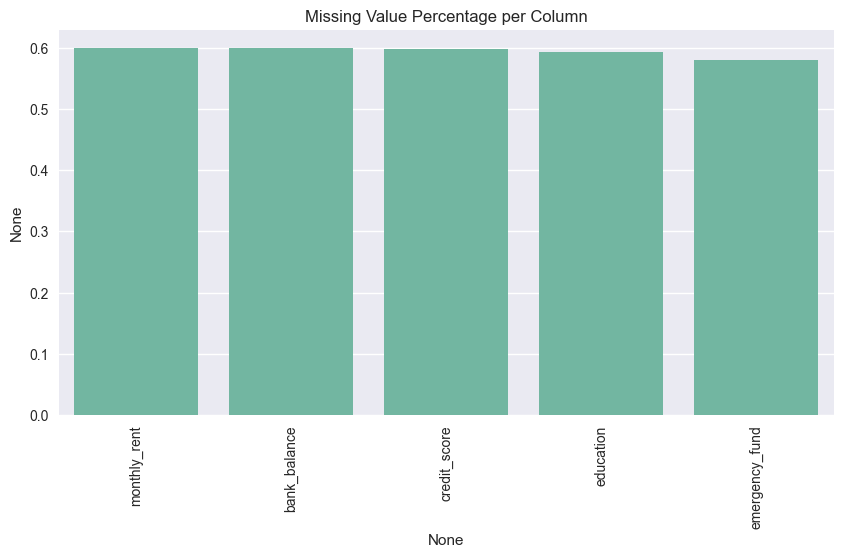

In [8]:
# Visualize missing values
plt.figure(figsize=(10,5))
sns.barplot(y=missing_pct[missing_pct>0], x=missing_pct[missing_pct>0].index)
plt.xticks(rotation=90)
plt.title("Missing Value Percentage per Column")
plt.show()


In [9]:
print("\n Data Types Summary:")
display(df.dtypes.value_counts())



 Data Types Summary:


object     12
float64    12
int64       3
Name: count, dtype: int64

In [10]:
#  Unique Value Counts for Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
unique_counts = df[cat_cols].nunique().sort_values(ascending=False)
display(pd.DataFrame(unique_counts, columns=['Unique Values']))


,Unique Values
monthly_salary,13662
bank_balance,12261
age,31
gender,8
emi_scenario,5
company_type,5
education,4
house_type,3
emi_eligibility,3
employment_type,3



 EMI Eligibility Class Distribution:


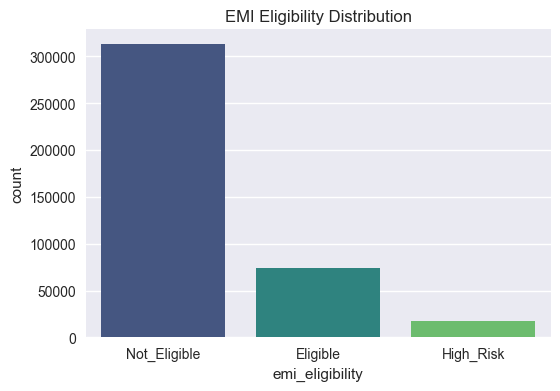

emi_eligibility
Not_Eligible    77.289526
Eligible        18.390316
High_Risk        4.320158
Name: proportion, dtype: float64


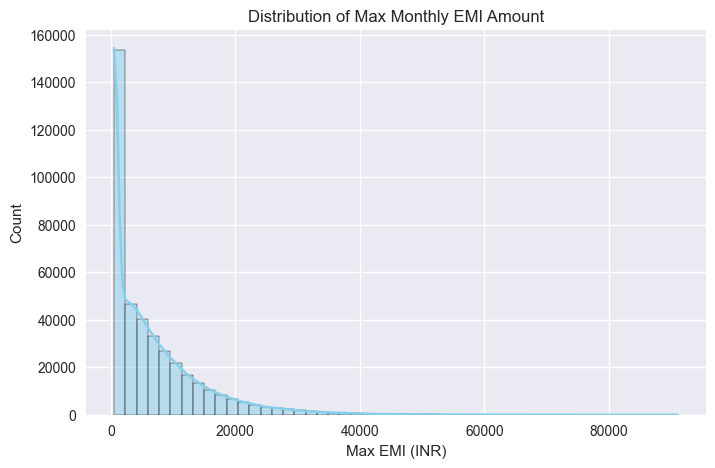

In [11]:
#  Target Variable Distributions
if 'emi_eligibility' in df.columns:
    print("\n EMI Eligibility Class Distribution:")
    plt.figure(figsize=(6,4))
    sns.countplot(x='emi_eligibility', data=df, order=df['emi_eligibility'].value_counts().index, palette="viridis")
    plt.title("EMI Eligibility Distribution")
    plt.show()
    print(df['emi_eligibility'].value_counts(normalize=True)*100)

if 'max_monthly_emi' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['max_monthly_emi'], bins=50, kde=True, color="skyblue")
    plt.title("Distribution of Max Monthly EMI Amount")
    plt.xlabel("Max EMI (INR)")
    plt.show()

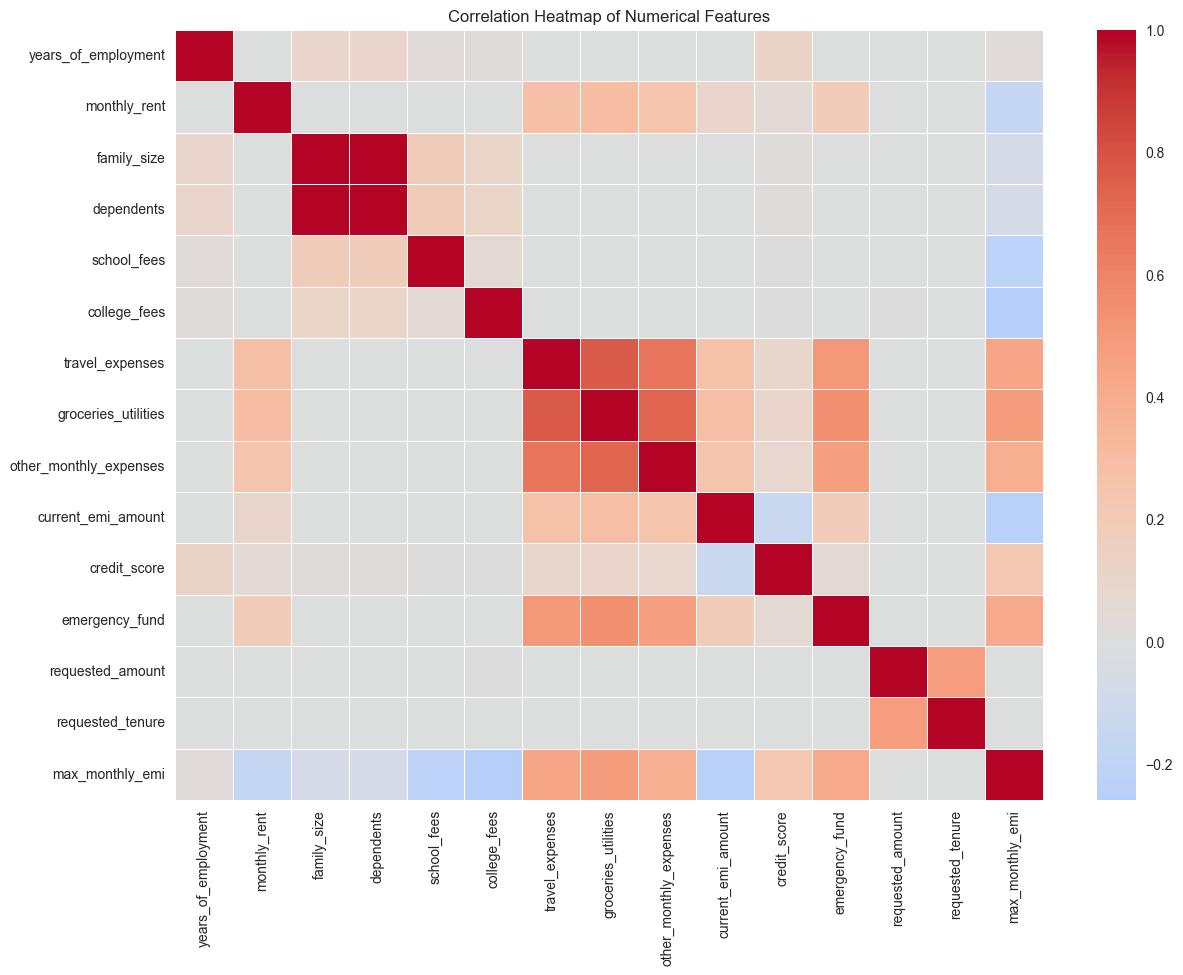

In [12]:
#  Numerical Feature Correlations
num_df = df.select_dtypes(include=['int64','float64'])
corr = num_df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [13]:
# Top correlated features with target 
if 'max_monthly_emi' in df.columns:
    corr_target = corr['max_monthly_emi'].sort_values(ascending=False).head(15)
    print("\n Top 15 Features Correlated with Max Monthly EMI:")
    display(corr_target)



 Top 15 Features Correlated with Max Monthly EMI:


max_monthly_emi           1.000000
groceries_utilities       0.484695
travel_expenses           0.440948
emergency_fund            0.415231
other_monthly_expenses    0.382055
credit_score              0.229441
years_of_employment       0.028887
requested_tenure          0.001006
requested_amount         -0.002034
dependents               -0.062266
family_size              -0.062266
monthly_rent             -0.170097
school_fees              -0.215234
current_emi_amount       -0.242434
college_fees             -0.258842
Name: max_monthly_emi, dtype: float64

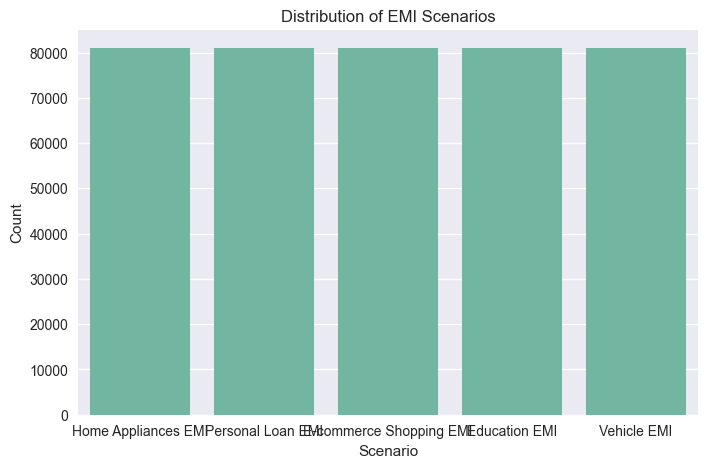

In [14]:
#  EMI Scenario Insights
if 'emi_scenario' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='emi_scenario', data=df, order=df['emi_scenario'].value_counts().index)
    plt.title("Distribution of EMI Scenarios")
    plt.xlabel("Scenario")
    plt.ylabel("Count")
    plt.show()

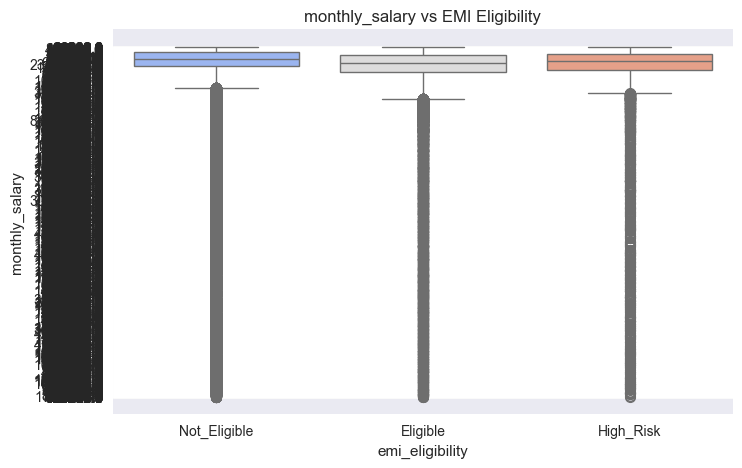

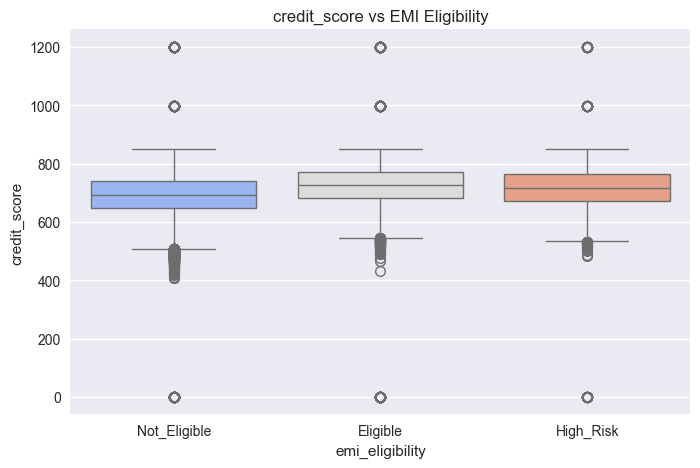

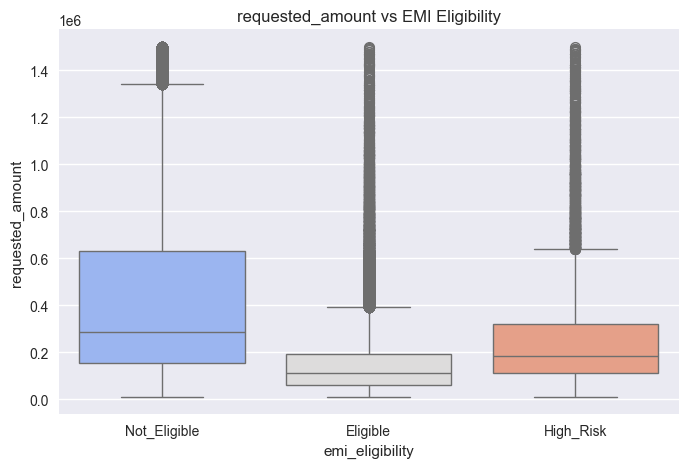

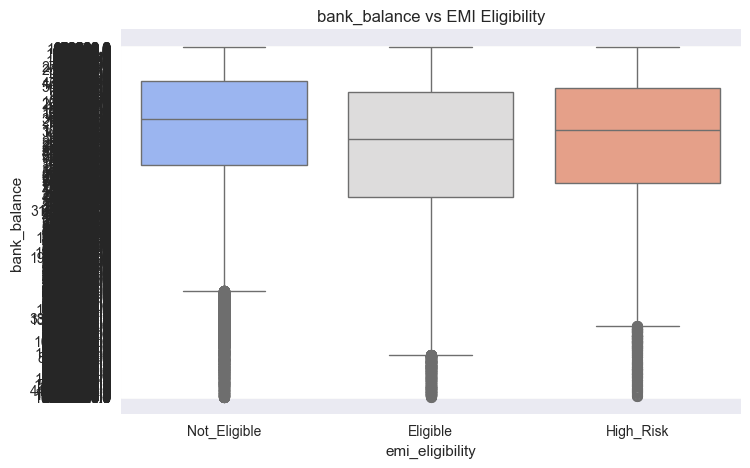

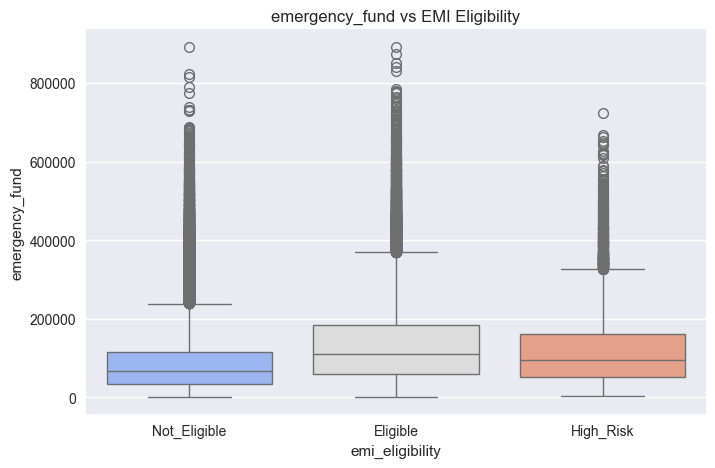

In [15]:

#  EMI Eligibility vs Key Financial Metrics
if 'emi_eligibility' in df.columns:
    features_to_plot = ['monthly_salary', 'credit_score', 'requested_amount', 'bank_balance', 'emergency_fund']
    for feat in features_to_plot:
        if feat in df.columns:
            plt.figure(figsize=(8,5))
            sns.boxplot(x='emi_eligibility', y=feat, data=df, palette="coolwarm")
            plt.title(f"{feat} vs EMI Eligibility")
            plt.show()


In [23]:
#  Save Clean Summary
eda_summary = {
    "rows": df.shape[0],
    "cols": df.shape[1],
    "missing_pct_mean": round(missing_pct.mean(), 2),
    "class_balance": df['emi_eligibility'].value_counts(normalize=True).to_dict() if 'emi_eligibility' in df.columns else "N/A",
    "numeric_features": len(num_df.columns),
    "categorical_features": len(cat_cols),
}
pd.Series(eda_summary).to_csv("../data/eda_summary.csv")

print(" EDA completed and summary saved to 'data/eda_summary.csv'")


 EDA completed and summary saved to 'data/eda_summary.csv'
